# 06_associations_gtdbtk

This document explores the phylogenetic make-up of identified MAGs with associated viruses. The data loaded is all_associations_gtdb.csv (created with 05 assoc_gtdb_merge_script.py)

## Load packages and data

In [9]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/Bigelow/Virus_Project/OMZ_MH_Analysis/Data/all_associations_gtdb.csv')

## How many associations were classified in total?

In [2]:
tot = len(df['domain'])
tot

336

## How many MAGs were classified to at least that classification level?

In [10]:
# function to count how many were classified based on an input dataframe and taxonomic level

def count_classified(df, level):
    
    level_prefix = level[0] + '__' # create level prefixes
    
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)] # all conditions that level is unannotated
   
    return len(subdf)  # returns number of rows with annotation for level

level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    lcount = count_classified(df, level)
    
    print('There are', lcount, 'MAGs annotated to', level,".") 
    
    level_counts.append(lcount)

There are 290 MAGs annotated to domain .
There are 196 MAGs annotated to phyla .
There are 196 MAGs annotated to class .
There are 196 MAGs annotated to order .
There are 196 MAGs annotated to family .
There are 166 MAGs annotated to genus .
There are 129 MAGs annotated to species .


In [15]:
# create a data frame of the number of MAGs associated with each level
dict_assoc = {'tax_level': levels, 'num_associations_classified': level_counts} # create a dictionary with the number classified for each level

GTDB_assoc = pd.DataFrame(data = dict_assoc)

GTDB_assoc['percent_classified'] = GTDB_assoc['num_associations_classified']/tot*100 # add a column to the dataframe that is the percent of MAGs

GTDB_assoc

,tax_level,num_associations_classified,percent_classified
0,domain,290,86.309524
1,phyla,196,58.333333
2,class,196,58.333333
3,order,196,58.333333
4,family,196,58.333333
5,genus,166,49.404762
6,species,129,38.392857


Text(0.5, 1.0, 'Percent of MAGs Classified with GTDB')

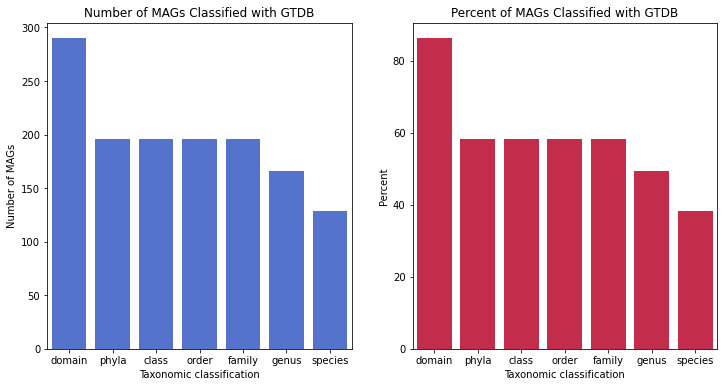

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

sns.barplot(x = 'tax_level', y= 'num_associations_classified', data = GTDB_assoc, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of MAGs')
axes[0].set_title('Number of MAGs Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = GTDB_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of MAGs Classified with GTDB')

## What are the most common classifications?

In [17]:
phyla_assoc = df.groupby('phyla', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_phyla_assoc = phyla_assoc [2:11] # 1 is NA

class_assoc = df.groupby('class', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_class_assoc = class_assoc [2:11] # 1 is NA

order_assoc = df.groupby('order', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_order_assoc = order_assoc [2:11] # 1 is NA

Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

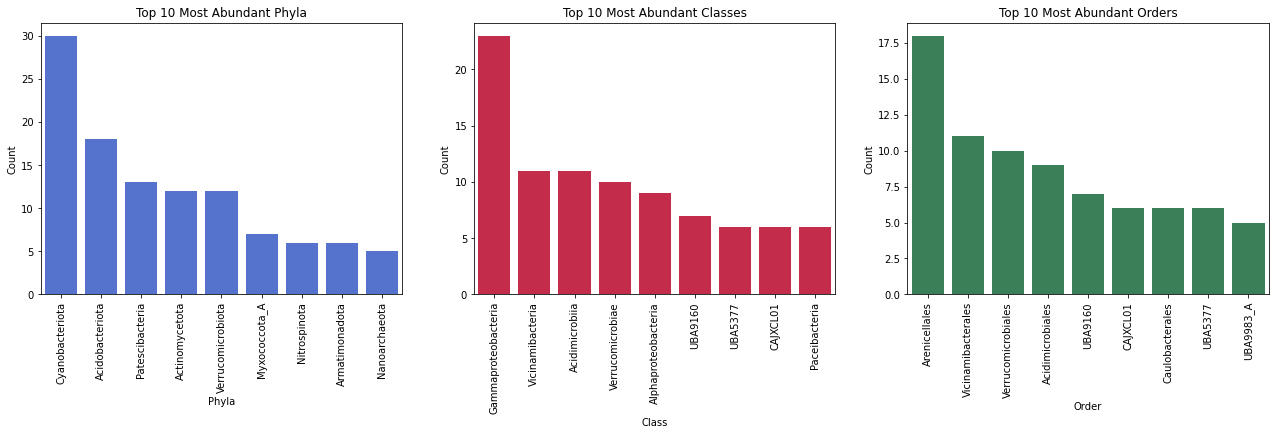

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'host_name', data = top_phyla_assoc, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'host_name', data = top_class_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'host_name', data = top_order_assoc, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')


## Plot tax level

In [19]:
top_10_class = list(df.groupby('class', as_index = False)['host_name'].count().sort_values(by = 'host_name', ascending = False)[:10]['class'])

plot_class = []

for item in df['class']:
    if item in top_10_class:
        plot_class.append(item)
    else:
        plot_class.append('Other')

df['plot_class'] = plot_class

Text(0.5, 1.0, 'Count')

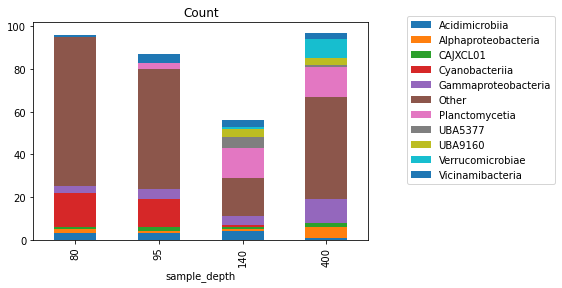

In [20]:
class_counts_assoc = df.groupby(['sample_depth', 'plot_class'], as_index = False)['host_name'].count().pivot(columns = 'plot_class', index = 'sample_depth', values = 'host_name')

class_counts_assoc.plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Count')

Text(0.5, 1.0, 'Percent')

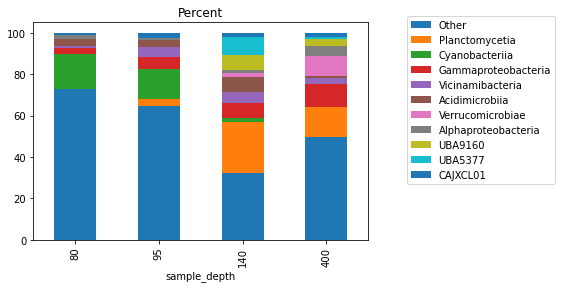

In [21]:
column_order = ['Other'] + top_10_class

class_pcts = class_counts_assoc.div(class_counts_assoc.sum(axis=1), axis=0)
class_pcts = round(class_pcts * 100, 1)



class_pcts[column_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Percent')